## Logistic Regression

Agenda:

Using logistic regression you predict whether a passenger is alive or not.

Inference to be shown:

You have more than one feature here, and If the value of the model predicts 0.79, that would mean a person is 79% alive and 21% dead.

Intermediate steps involved:

1. Countplot for survived vs sex

2. Find out the number of missing values

3. Boxplot for Pclass and age

4. Heatmap to check for null values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\\Data Science\\titanic.csv")
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### 1. Countplot for survived vs sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

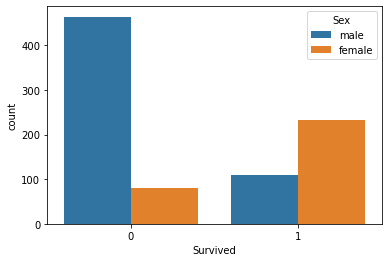

In [4]:
sns.countplot(x='Survived',hue='Sex',data=data)

### 2. Find out the number of missing values

In [5]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### None of the values are missing in the dataset.

### 3. Boxplot for Pclass and age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

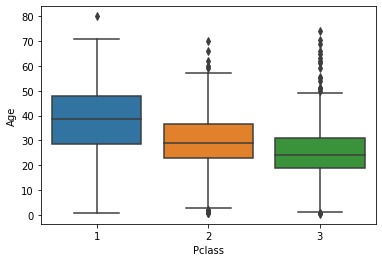

In [6]:
sns.boxplot(x="Pclass",y="Age",data=data)

### 4. Heatmap to check for null values.

<AxesSubplot:>

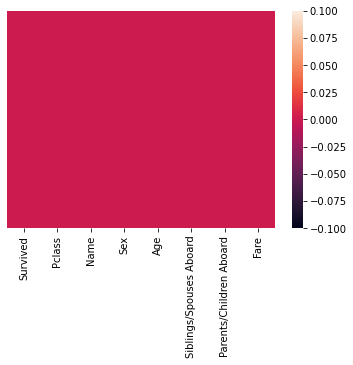

In [7]:
sns.heatmap(data.isnull(), yticklabels=False)

### Columns need to be converted to 0 and 1. 
Sex is categorical data while Pclass should be categorical data as well.
Sex,Pclass, Sibling/Spouses,Parents/Children Aboard need to be encoded

In [8]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [9]:
pcl = pd.get_dummies(data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [10]:
data=pd.concat([data,sex,pcl],axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [11]:
data.drop(['Sex','Pclass','Name'],axis=1,inplace=True)

In [12]:
data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


### Data is ready

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
x=data.drop('Survived', axis=1)
y=data["Survived"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
LR = LogisticRegression(max_iter=500)

In [22]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [23]:
prediction=LR.predict(x_test)

In [24]:
prediction

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

In [27]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.80       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.76       267\n   macro avg       0.75      0.75      0.75       267\nweighted avg       0.76      0.76      0.76       267\n'

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,prediction)

array([[130,  32],
       [ 31,  74]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,prediction)

0.7640449438202247